# Braille Text Translator

## 1. Transform original image into binary matrix

### Import initial libraries

In [0]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

### Add utilitary functions used for the program

In [0]:
# normalizes image pixels between 0 and 255
def normalize(img):
	imin = np.min(img)
	imax = np.max(img)

	return (((img - imin)/(imax - imin)) * 255).astype(np.float)

def printImage(img):
  plt.figure(figsize=(16,8)) 
  plt.imshow(mat, cmap="gray", vmin=0, vmax=255)
  
  
def printImage2(img):
  plt.figure(figsize=(16,8)) 
  plt.imshow(mat, cmap="gray")  

In [0]:
# Apply laplacian filter with image I
def LaplacianFilter(I):
  J = np.empty(I.shape, dtype=np.float)
  N, M = I.shape
  for i in range(N):
    for j in range(M):
      if i > 0 and i+1 < N and j > 0 and j+1 < M:
        J[i, j] = I[i-1, j] + I[i+1, j] + I[i, j-1] + I[i, j + 1] + I[i+1, j+1] + I[i-1, j-1] + I[i-1, j+1] + I[i+1, j-1] - 8 * I[i, j]
      else:
        J[i, j] = I[i, j]
  return J      

In [0]:
# applies mean filter to image I
def MeanFilter(I, n):
	m = n//2
	J = np.empty(I.shape, dtype=np.float) # the answer
	N, M = I.shape
	I = np.pad(I, ((m, m), (m, m)), 'symmetric')
	for	i in range(N):
		for j in range(M):
			# copies the matrix to sub
			sub = I[i+m:(i+m+n), j+m:(j+m+n)]
			J[i, j] = np.median(np.ravel(sub)) # get median of the linearized list
	return J

In [0]:
# Power transformation on the image, to enhance the pixels with least intensity
def gammaCorrection(I):
  J = np.empty(I.shape, dtype=np.float) # the answer
  N, M = I.shape
  for i in range(N):
    for j in range(M):
      J[i, j] = 10 * (I[i, j] ** (0.5))
  return J

### Transforming image

1.jpg
0.0
254.97449999999998
0.0
159.6871942267131
14.88595509753797
255.0


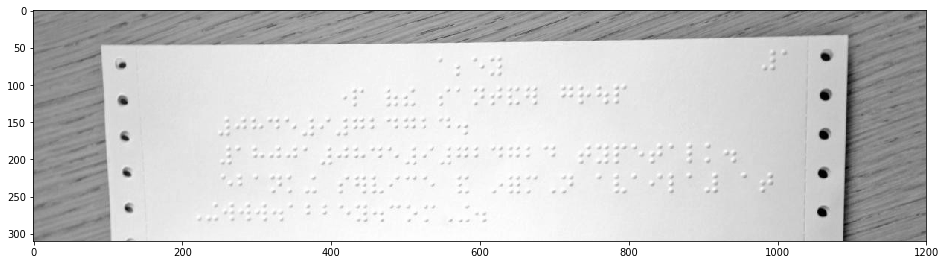

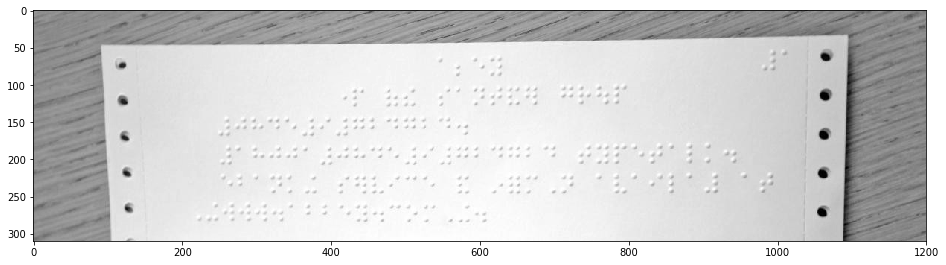

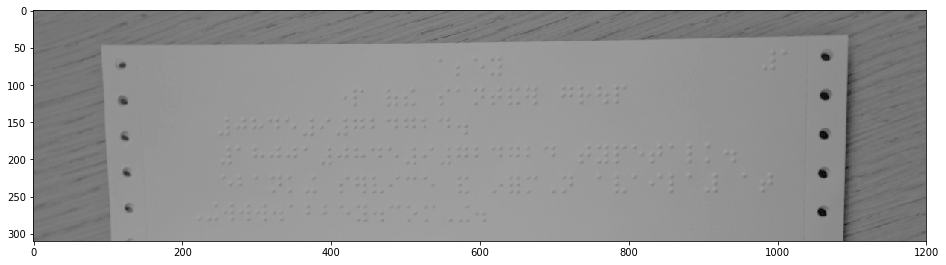

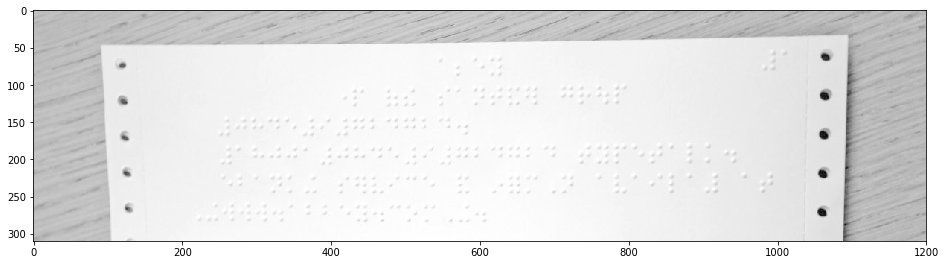

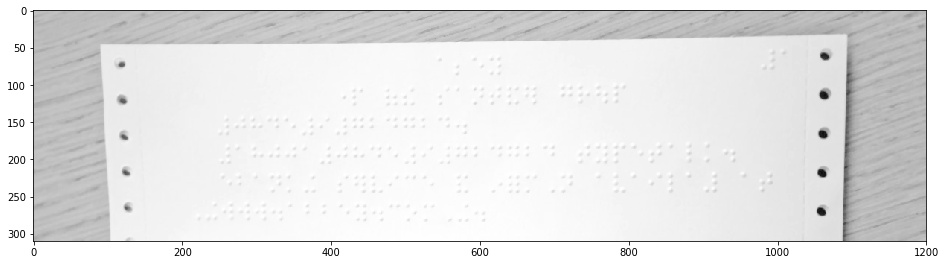

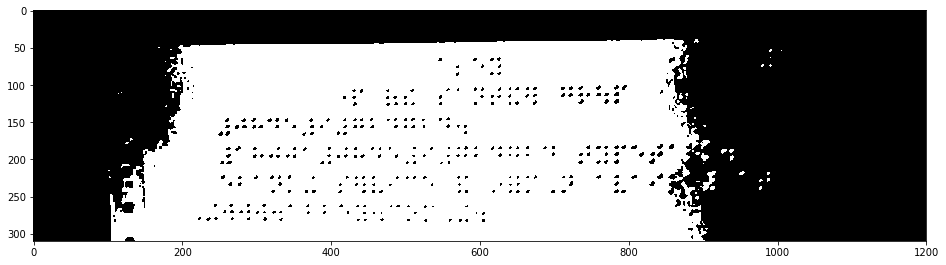

In [31]:
filename = str(input()).rstrip() # filename of the input image
image = imageio.imread(filename)
matrix = np.array(image, copy=True, dtype=np.float)

N, M, _ = matrix.shape

# Transform RGB to gray scale
for i in range(N):
  for j in range(M):
    matrix[i, j, 0] = matrix[i, j, 0] * 0.2989 + matrix[i, j, 1] * 0.5870 + matrix[i, j, 2] * 0.1140
    
matrix = matrix[:, :, 0:1].squeeze()

# Plot original image
mat = matrix.astype(np.uint8)
printImage(mat)

print(np.min(matrix))
print(np.max(matrix))

matrix = normalize(matrix)
mat = matrix.astype(np.uint8)
printImage(mat)

matrix = gammaCorrection(matrix)
# Plot gamma corrected image
mat = matrix.astype(np.uint8)
printImage(mat)

print(np.min(matrix))
print(np.max(matrix))

matrix = normalize(matrix)
mat = matrix.astype(np.uint8)
printImage(mat)
# Smooth image using mean filter, to reduce noise
matrix = MeanFilter(matrix, 3)

print(np.min(matrix))
print(np.max(matrix))

# Plot filtered image
mat = matrix.astype(np.uint8)
printImage(mat)



a = np.median(matrix)
# Transform the matrix into binary matrix using thresholding
for i in range(N):
  for j in range(M):
    matrix[i, j] = 0 if matrix[i, j] < a else 1


# Plot segmented image
mat = matrix.astype(np.uint8)
printImage2(mat)



In [0]:
# talvez aqui a gente podia colocar um high pass low pass sei la kk filter, pra ele pegar so as transicoes, e ignorar flat regions

## 2. Remove noise

## 3. Determine diameter D of a braille circle

## 4. Segment image into blocks

## 5. For each block, determine which letter it represents


## 6. Insert corresponding letter on top of the block it represents